In [81]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
import seaborn as sns

%matplotlib inline

In [82]:
X,y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10)

In [83]:
def perceptron(X,y, lr=0.1, n_iter=1000):
    X = np.insert(X,0,1,axis=1) # adding bias term

    # weights initialization
    weights = np.random.rand(X.shape[1])
    history = []
    errors = []
    accuracy = []

    

    for i in range(n_iter):
        correct_predictions = 0
        for j in range(X.shape[0]):  # iterate through all samples
            y_pred = 1 if np.dot(X[j], weights) > 0 else 0
            error = y[j] - y_pred
            weights += lr * error * X[j]
            correct_predictions += (y_pred == y[j])
        
        # storing weights and accuracy for each epoch
        history.append(weights.copy())
        acc = correct_predictions / X.shape[0]
        accuracy.append(acc)
        
    return weights[0], weights[1:], history, accuracy  # returning bias and weights separately

## Stochastic version is not used here 

In [84]:
intercept_, coef_, history, accuracy = perceptron(X,y)

In [85]:
print("Intercept (bias):", intercept_)
print("Coefficients (weights):", coef_)

Intercept (bias): 0.9160331426449141
Coefficients (weights): [ 0.01583117 -0.36447791]


In [97]:
def plot_decision_boundaries_progression(X, y, history, interval,accuracy):
    # Calculate the number of subplots needed
    num_plots = len(range(0, len(history), interval))
    n_cols = int(np.ceil(np.sqrt(num_plots)))
    n_rows = (num_plots + n_cols -1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    # Set the plot limits
    xlim = (X[:, 0].min() - 1, X[:, 0].max() + 1)
    ylim = (X[:, 1].min() - 1, X[:, 1].max() + 1)
    xx = np.linspace(xlim[0], xlim[1], 100)
    
    # Plot decision boundaries at regular intervals
    for i, epoch in enumerate(range(0, len(history), interval)):
        ax = axes[i]
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab20c', alpha=0.7)
        weights = history[epoch]

        intercept_ = weights[0]
        coef_ = weights[1:]
        yy = -(intercept_ + coef_[0] * xx) / coef_[1]
        ax.plot(xx, yy, 'k-', lw=2)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_title(f'Epoch {epoch+1}\nAccuracy: {accuracy[epoch]*100:.2f}%')
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    fig.suptitle('Progression of Decision Boundaries with Accuracies', fontsize=16)
    plt.tight_layout()
    plt.show()

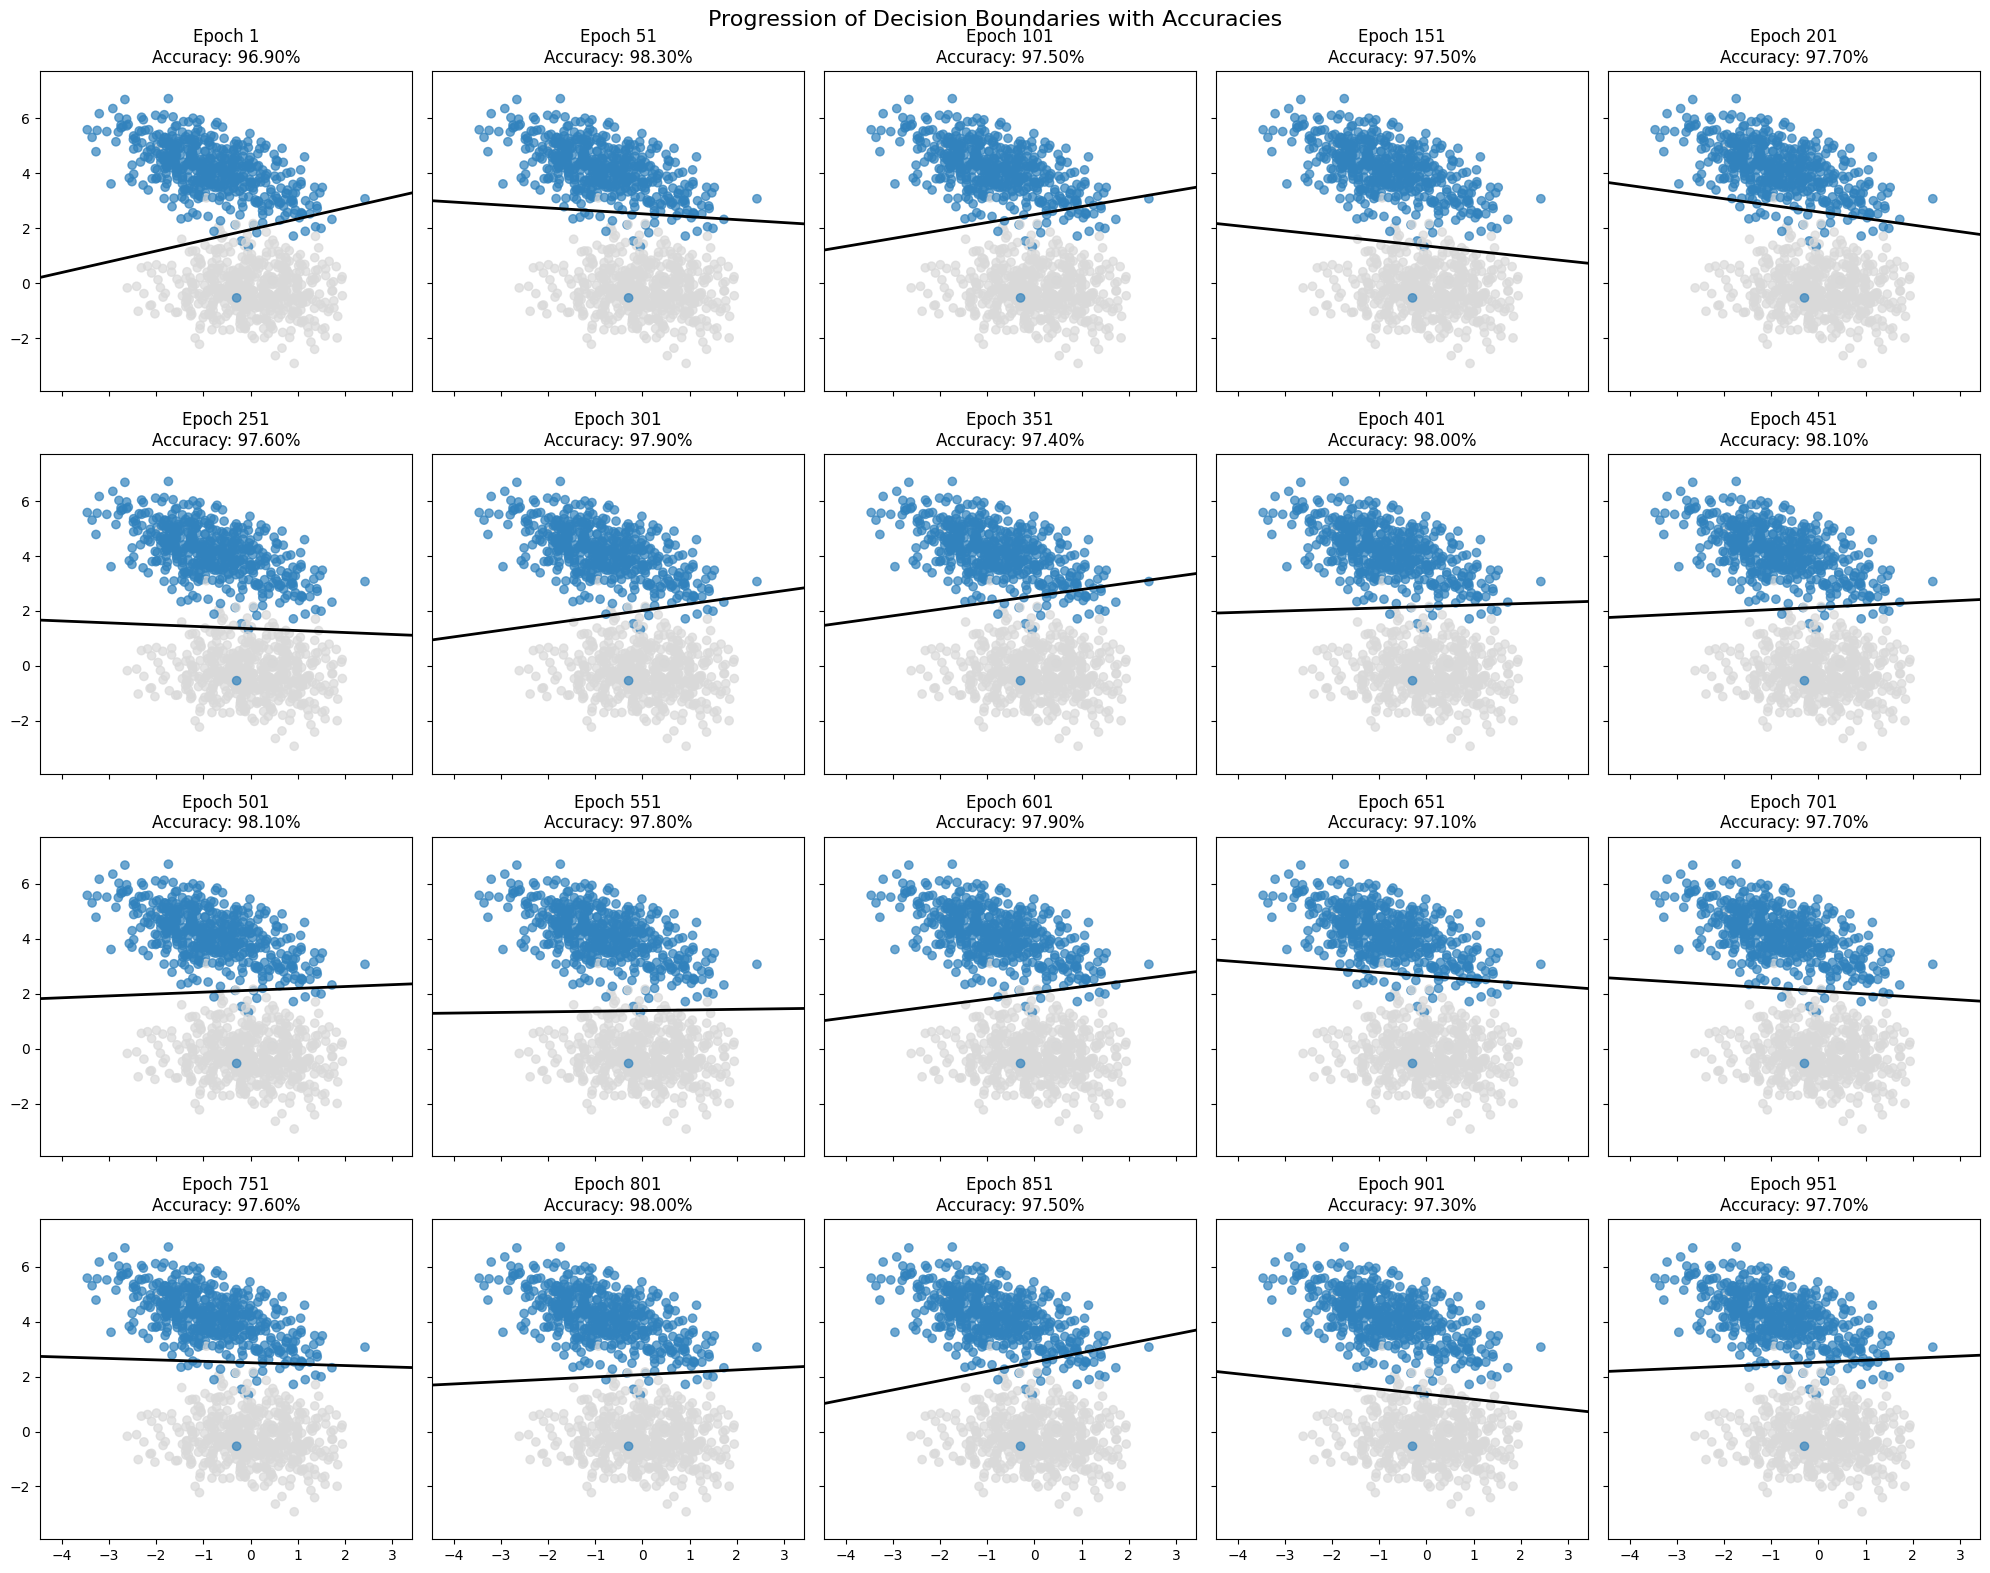

In [98]:
plot_decision_boundaries_progression(X,y,history,interval=50, accuracy=accuracy)

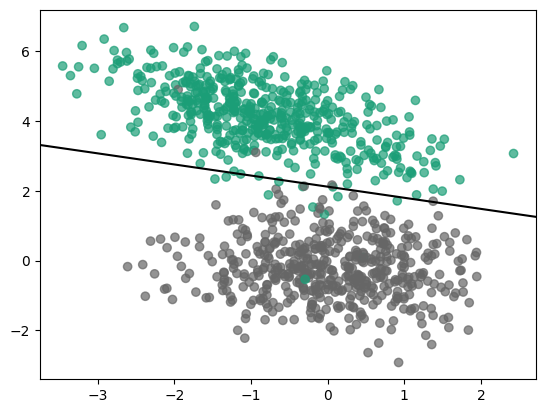

In [99]:
# plotting the data and decision boundary
fig, axes = plt.subplots()
axes.scatter(X[:,0], X[:,1], c=y, cmap='Dark2', alpha = 0.7)
xlim = axes.get_xlim()
ylim = axes.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = -(intercept_ + coef_[0] * xx) / coef_[1]
axes.plot(xx, yy, 'k-')
axes.set_xlim(xlim)
axes.set_ylim(ylim)
plt.show()


In [100]:
def perceptron_with_loss_fxn(X,y,lr=0.1,n_iter=1000,patience=10):
    X = np.insert(X,0,1,axis=1) # adding bias term

    # initializing weights 
    weights = np.random.rand(X.shape[1])
    history = []
    losses = []
    accuracy = []

    best_acc = 0
    best_weights = None
    epochs_without_improvement = 0

    for i in range(n_iter):
        correct_predictions = 0
        total_loss = 0
        
        indices = np.random.permutation(X.shape[0])
        for j in indices:
            y_pred = 1 if np.dot(X[j], weights) > 0 else 0
            error = y[j] - y_pred

            if error != 0:
                weights += lr * error * X[j] 

                total_loss = max(0, -y[j]*np.dot(X[j], weights))
            
            correct_predictions += (y_pred == y[j])

        history.append(weights.copy())
        losses.append(total_loss)
        acc = correct_predictions / X.shape[0]
        accuracy.append(acc)

        if acc > best_acc:
            best_acc = acc
            best_weights = weights.copy()
            epochs_without_improvement = 0

        else:
            epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping at epoch {i+1} with best accuracy {best_acc*100:.2f}%")
            break

        weights = best_weights
    
    return weights[0], weights[1:], history, losses, accuracy  # returning bias and weights separately

In [101]:
intercept_, coef_, history2, losses, accuracy2 = perceptron_with_loss_fxn(X,y,0.01,patience=len(X))

print("Intercept (bias):", intercept_)
print("Coefficients (weights):", coef_)

Intercept (bias): 0.09665051864495859
Coefficients (weights): [ 0.01102305 -0.06183397]


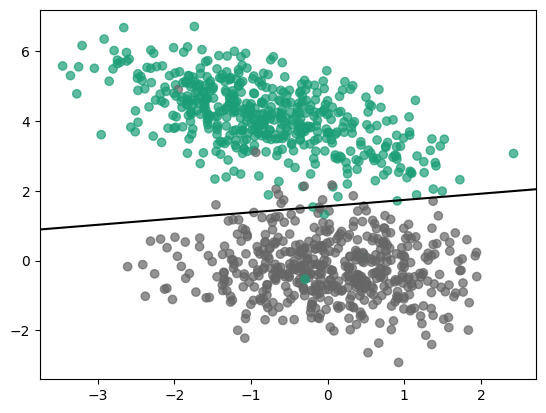

Accuracy: 97.90%


In [102]:
# plotting the data and decision boundary
fig, axes = plt.subplots()
axes.scatter(X[:,0], X[:,1], c=y, cmap='Dark2', alpha = 0.7)
xlim = axes.get_xlim()
ylim = axes.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = -(intercept_ + coef_[0] * xx) / coef_[1]
axes.plot(xx, yy, 'k-')
axes.set_xlim(xlim)
axes.set_ylim(ylim)
plt.show()

print(f"Accuracy: {accuracy2[-1]*100:.2f}%")

c:\Users\aarad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aarad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


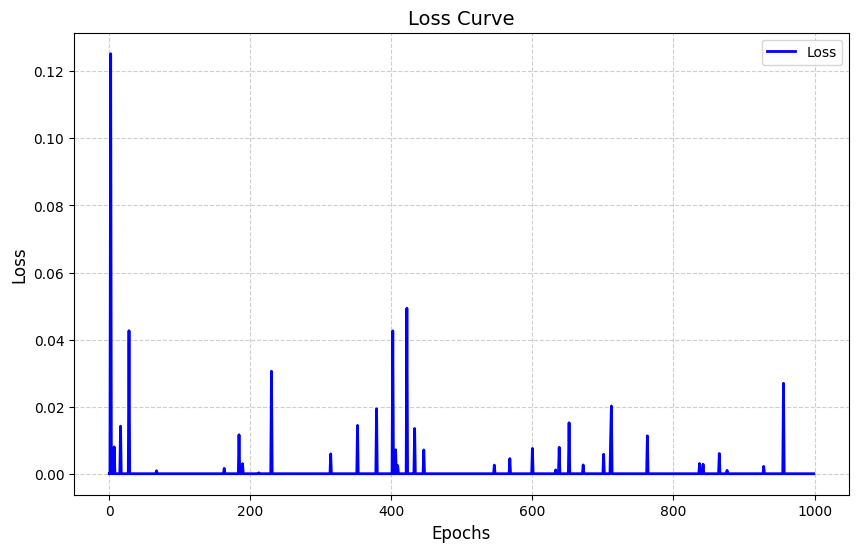

In [103]:
# Plotting the loss curve with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(losses)), y=losses, label='Loss', color='blue', linewidth=2)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss Curve', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

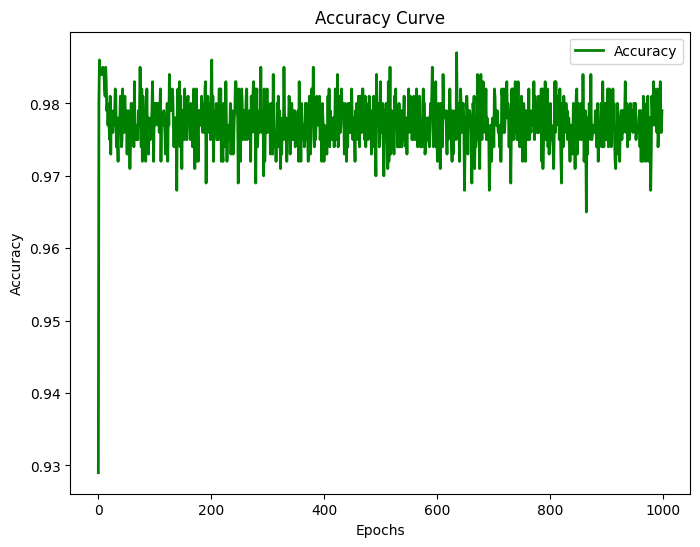

In [104]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(accuracy2)), accuracy2, label='Accuracy', color='green', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

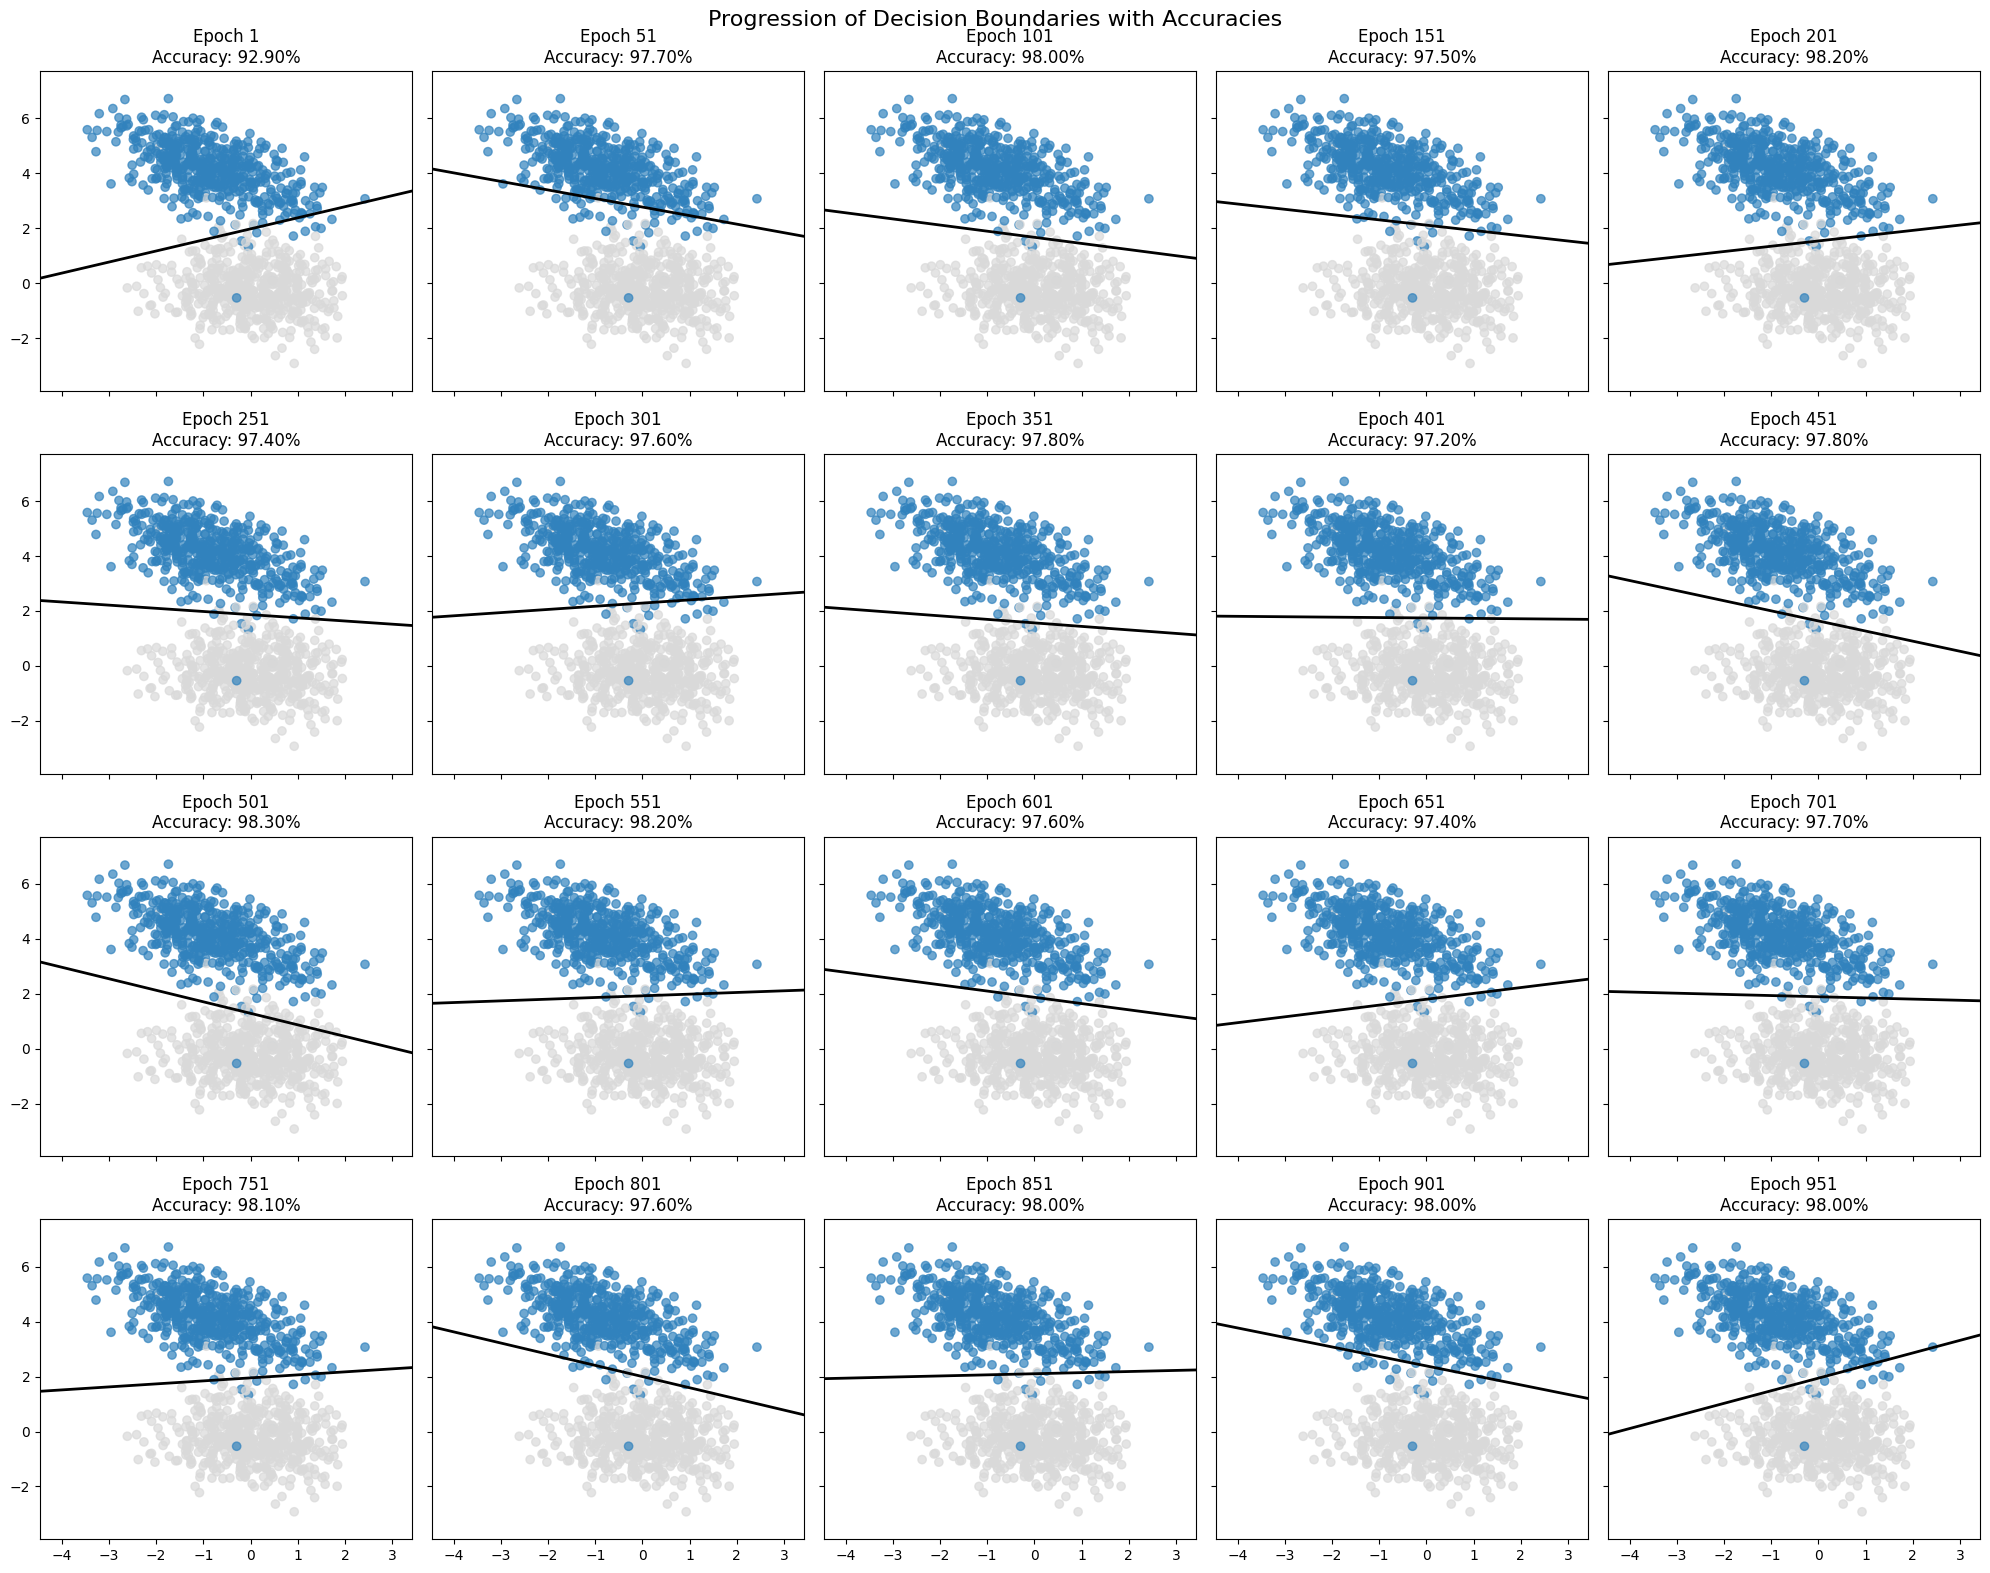

In [105]:
plot_decision_boundaries_progression(X,y,history2,interval=50, accuracy=accuracy2)